# Constrained Optimization

1. Equality Constrained Optimization
    * Lagrange multiplier
2. Inequality Constrained Optimization
    * Steepest descent
    * Newton's method
    * [Quasi-Newton method](#first-bullet3)
        * [Broyden-Fletcher-Goldfarb-Shanno (BFGS)](#first-bullet4)
        * Penalty method



## Quasi-Newton methods <a class="anchor" id="first-bullet3"></a>

Quasi-Newton methods do not require the Hessian. They lose quadratic convergence but retain superlinear convergence. They have the general form:

$$
x_{k+1} = x_k - \alpha_k B_k^{-1} \nabla f(x_k)
$$

where $\alpha_k$ is a line search parameter and $B_k$ is some approximation to the Hessian.

---

### Broyden-Fletcher-Goldfarb-Shanno (BFGS) <a class="anchor" id="first-bullet4"></a>

In each step we solve

$$
B_k s_k =  - \nabla f(x_k)
$$

where $B_k$ is a Hessian approximation, $s_k$ is a step, $\nabla f(x_k)$ is the gradient of our objective. So we can write $x_{k+1} = x_k + s_k$ and $y_k = \nabla f(x_{k+1}) - \nabla f(x_k)$.

Updating approx. Hessian $B_k$ should satisfy 

$$
B_{k+1} s_k = y_k \quad (*)
$$

which tells how much does the gradient change in that direction that we've moved.

Then to make a minimal adjustment $B_k$ to satisfy $(*)$, and retain **symmetric positive definit (SPD)** property, we make the update 

$$
B_{k+1} = B_k + \alpha uu^T + \beta vv^T
$$

Let $u = y_k$ and $v= B_ks_k$, we can write

$$
B_{k+1} = B_k + \alpha y_k y_k^T + \beta B_k s_k s_k^T B_k
$$

From $(*)$, we get

$$
y_k = B_{k+1} s_k = B_k s_k + \alpha y_k y_k^T s_k + \beta B_k s_k s_k^T B_k s_k
$$

from which we can solve for

$$
\alpha= {1\over y_k^T s_k}, \quad \beta = -{1\over s_k^T B_k s_k}
$$

Plug in $\alpha$ and $\beta$, we get

$$
B_{k+1} = B_k + {y_ky_k^T\over y_k^T s_k} - {B_k s_ks_k^T B_k\over s_k^TB_ks_k}
$$


---

The idea in BFGS algorithm of updating $B_k$ by

$$
B_{k+1} = B_k + \alpha uu^T + \beta vv^T
$$

comes from the **Broyden root-finding algorithm**.

The original idea is to build up $J_k$ through successive steps, by making minimal changes to $J_k$ that are consistent with:

$$
J_k \Delta x_k = \Delta F_k
$$


The good choice of algorithm to update $J_k$ is

$$
J_k = J_{k-1} + {\Delta F_k - J_{k-1} \Delta x_k \over ||\Delta x_k||^2} \Delta x_k^T
$$

And then solve $x_{k+1} = x_{k} - J_k^{-1} F(x_k)$ to find root.

However, $J_k^{-1}$ is expensive. A better way is to use **Sherman-Morrison Formula** to update $J_k^{-1}$ and avoid inverting linear system at each step. The formula is of the form:

$$
(A + uv^T)^{-1} = A^{-1} - {A^{-1} uv^T A^{-1} \over 1 + v^TA^{-1}u}
$$

So the updating rule for $J_k^{-1}$ is

$$
J_K^{-1} = J_{k-1}^{-1} + {\Delta x_k - J_{k-1}^{-1} \Delta F_k \over \Delta x_k^T J_{k-1}^{-1} \Delta F_k} \Delta x^T J_{k-1}^{-1}
$$



---

The pseudocode for BFGS is

> 1 choose initial guess $x_0$
>
> 2 choose $B_0$, initial Hessian guess, e.g. $B_0 = I$
>
> 3 **for** $k=0,1,2,...$ **do**
>
> 4 $\quad$ solve $B_k s_k = - \nabla f(x_k)$
> 
> 5 $\quad$ $x_{k+1} = x_k + s_k$
> 
> 6 $\quad$ $y_k = \nabla f(x_{k+1}) - \nabla f(x_k)$
>
> 7 $\quad$ $B_{k+1} = B_k + \nabla B_k$
> 
> 8 **end for**

where

$$
\nabla B_{k} ={y_ky_k^T\over y_k^T s_k} - {B_k s_ks_k^T B_k\over s_k^TB_ks_k}
$$

as derived above.

However, the actual implementation of BFGS stores and updates inverse Hessian to avoid solving linear system as mentioned above.

The actual pseudocode of BFGS is

> 1 choose initial guess $x_0$
>
> 2 choose $H_0$, initial inverse Hessian guess, e.g. $H_0 = I$
>
> 3 **for** $k=0,1,2,...$ **do**
>
> 4 $\quad$ calculate $s_k = - H_k \nabla f(x_k)$
> 
> 5 $\quad$ $x_{k+1} = x_k + s_k$
> 
> 6 $\quad$ $y_k = \nabla f(x_{k+1}) - \nabla f(x_k)$
>
> 7 $\quad$ $H_{k+1} = \Delta H_k $
> 
> 8 **end for**

where

$$
\Delta H_k = (I-s_k\rho_k y_k^T) H_k (I- \rho_ky_ks_k^T) + \rho_k s_k s_k^T, \quad \rho_k = {1\over y_k^T s_k}
$$

### Newton's method for minimizing Himmelblau's function

$$
f(x,y) = (x^2 + y -11)^2 + (x+y^2-7)^2
$$


From the 3d plot we can see that Himmelblau function has four local minima and one maximum.

In [1]:
import numpy as np

# Himmelblau function
def f(x,y):
    return (x*x+y-11)**2+(x+y*y-7)**2

# Gradient of the Himmelblau function
def grad_f(x,y):
    return np.array([4*x*(x*x+y-11)+2*(x+y*y-7),2*(x*x+y-11)+4*y*(x+y*y-7)])

# Hessian of the Himmelblau function
def hess_f(x,y):
    return np.array([[4*(x*x+y-11)+8*x*x+2,4*x+4*y],[4*x+4*y,2+4*(x+y*y-7)+8*y*y]])

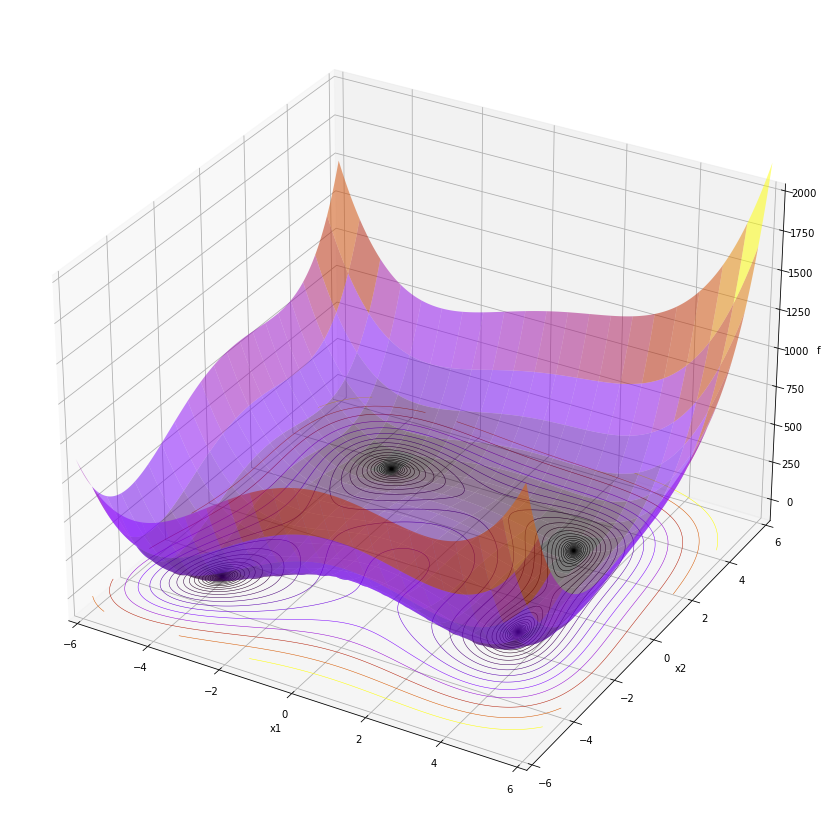

In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# plotting
ax=plt.figure(figsize=(20,15)).add_subplot(projection='3d')
x1 = np.linspace(-6,6,1000)
x2 = np.linspace(-6,6,1000)
X1, X2 = np.meshgrid(x1,x2)

# plot 3d surface
ax.plot_surface(X1,X2,f(X1,X2), rstride=50, cstride=50, alpha=0.5, cmap=plt.cm.gnuplot)

# plot a projection of the contours for the z dimension.
levels = np.logspace(-3,3,40)
ax.contour(X1,X2, f(X1,X2), zdir='z', offset=-50, linewidths=0.5,
          levels = levels, cmap=plt.cm.gnuplot)

ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-100,2000)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f')

plt.show()

Let's use BFGS to find a local minimum, starting from a random guess (8,8). We can see from the print-out and the 3d figure that the convergence is not faster than Newton's method, but the convergence rate is superlinear convergence.

In [3]:
import scipy.optimize as op

zs0 = []
zs1 = []
ffs = []

# Calculates the Himmelblau function (accepting a vector input)
def f_vec(z):
    ff=f(z[0],z[1])
    print(z[0],z[1],ff)
    zs0.append(z[0])
    zs1.append(z[1])
    ffs.append(ff)
    return ff

# Calculates the gradient of the Himmelblau function (accepting a vector input)
def grad_f_vec(z):
    return grad_f(z[0],z[1])

# Find minimum using BFGS
x=op.fmin_bfgs(f_vec,x0=np.array([8,8]),fprime=grad_f_vec,disp=False)

8.0 8.0 7946.0
7.306099306197884 7.26610502989805 5284.508031672287
-0.675536956081217 11.558868161733063 15859.873154913454
6.15914583907959 7.882970970136957 4970.032736332098
6.00779176320679 7.639854850288217 4363.387149861845
5.402375459715591 6.66739037089326 2454.351148172903
4.087141546913847 4.876113579953437 547.2450228676024
3.383678645244476 3.879257801714913 149.4341842451229
2.9045837652606523 3.14004318054138 33.56146602300509
2.6715923988940125 2.710015978878663 10.423359224664848
2.594954671507605 2.4847721491864534 6.30305008398469
2.5982231633336412 2.3601096830449166 4.933820138544944
2.6675015559725233 2.1942084796175303 3.0892417316929452
2.8397702923367425 1.9934962165640098 0.9224281880370673
2.986098841348925 1.909527973939271 0.16529949105148684
3.002912060515724 1.9434087964881284 0.05003976613449892
3.0006743300570977 2.00218219636263 0.0001273040082841613
3.000061053551808 1.9998738796556352 2.5431242521441735e-07
3.0000019017017667 1.9999979270406092 1.280

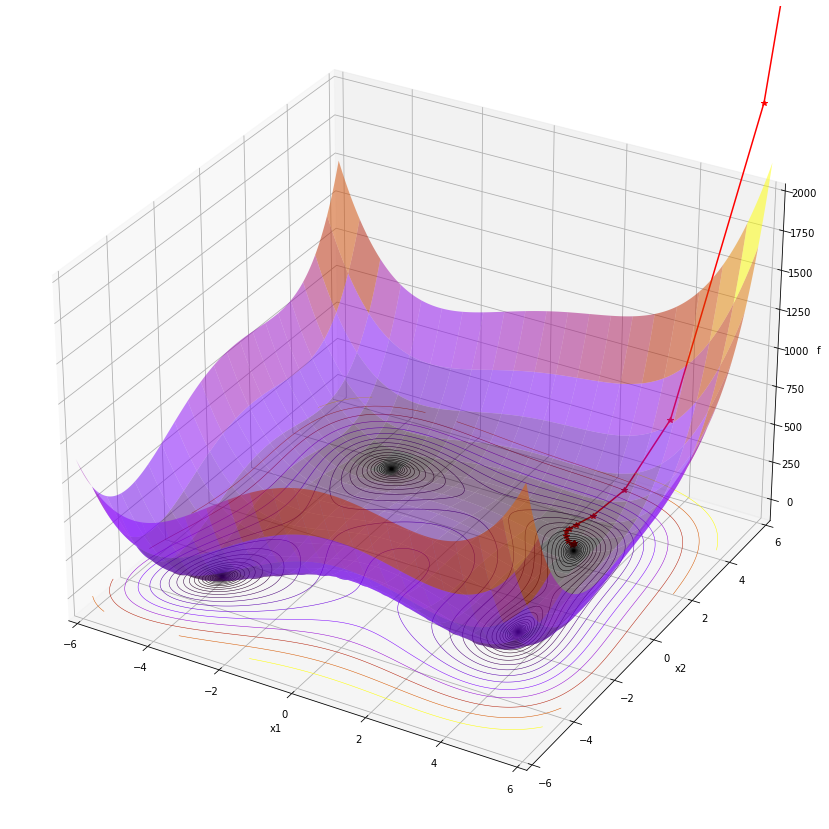

In [4]:
# plotting
ax=plt.figure(figsize=(20,15)).add_subplot(projection='3d')
x1 = np.linspace(-6,6,1000)
x2 = np.linspace(-6,6,1000)
X1, X2 = np.meshgrid(x1,x2)

# plot 3d surface
ax.plot_surface(X1,X2,f(X1,X2), rstride=50, cstride=50, alpha=0.5, cmap=plt.cm.gnuplot)

# plot a projection of the contours for the z dimension.
levels = np.logspace(-3,3,40)
ax.contour(X1,X2, f(X1,X2), zdir='z', offset=-50, linewidths=0.5,
          levels = levels, cmap=plt.cm.gnuplot)
ax.plot(zs0,zs1,ffs, color='r', marker='*')

ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-100,2000)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f')

plt.show()